<a href="https://colab.research.google.com/github/annefrancine/Deep-Learning-Models-/blob/master/Self_organizing_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Applications** 
http://archive.ics.uci.edu/ml/datasets/Credit+Approval

This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data

# Importing packages 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
Credit_Card_Applications = '/content/drive/My Drive/curso deep learning-udemy/Notebooks/6.SOM/Credit_Card_Applications.csv'

In [4]:
dataset = pd.read_csv(Credit_Card_Applications)
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [0]:
X = dataset.iloc[:, :-1].values# todas as linhas ,exceto a ultima coluna
y = dataset.iloc[:, -1].values # todas as linhas e a ultima coluna 

#Data normalization

In [0]:

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [10]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.4-cp36-none-any.whl size=8467 sha256=d61ef55b994116e4dbbcd7712dd5658a332ed190e9400ccc366036d23f55ec3f
  Stored in directory: /root/.cache/pip/wheels/85/84/20/28f3352b30a546473c7a4c78796eff9fdafa729a900f06d27d
Successfully built MiniSom


# Training

In [0]:

from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Dataviz 

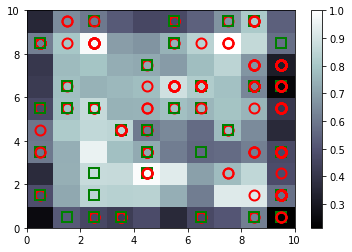

In [12]:

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x) 
    plot(w[0] + 0.5, 
         w[1] + 0.5, 
         markers[y[i]], 
         markeredgecolor = colors[y[i]], 
         markerfacecolor = 'None', 
         markersize = 10,
         markeredgewidth = 2) 
show()

# Fraud detection 

In [15]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(9,2)]), axis = 0)
frauds = sc.inverse_transform(frauds)
print(frauds)

[[0.27983935 0.         0.16285714 0.02392857 0.5        0.38461538
  0.875      0.06140351 1.         0.         0.         0.
  0.5        0.2        0.        ]
 [0.7401263  0.         0.46992481 0.16375    0.5        0.23076923
  0.875      0.03508772 0.         0.         0.         1.
  0.         0.12       0.        ]]
